<a href="https://colab.research.google.com/github/brayanricardo13/Analisis-Econometrico/blob/main/FIN_Y_FTC_Casa_de_Bolsa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import files
# Subir múltiples archivos
uploaded = files.upload()

In [3]:
FIN = pd.read_excel("/content/Valor de la Unidad.xlsx", sheet_name="FIN")

In [5]:
FTC = pd.read_excel("/content/Valor de la Unidad.xlsx", sheet_name="FTC")

In [ ]:
FIN.head()

In [ ]:
FTC.head()

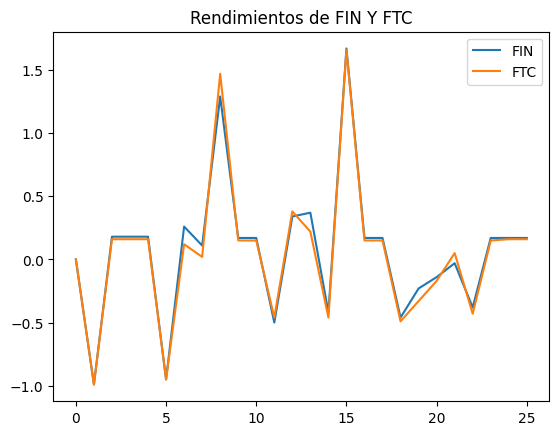

In [49]:
FIN['Rentab Diaria'].plot()
FTC['Rentab Diaria'].plot()
plt.title('Rendimientos de FIN Y FTC')
plt.legend(['FIN',"FTC"])

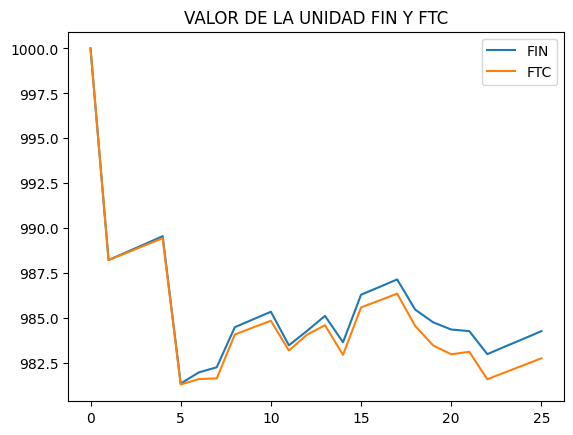

In [50]:
FIN["Valor Unidad"].plot()
FTC["Valor Unidad"].plot()
plt.title('VALOR DE LA UNIDAD FIN Y FTC')
plt.legend(['FIN',"FTC"])

In [51]:
nivel_confianza = 0.95

In [ ]:
FIN['Valor Unidad'].head()

In [ ]:
FIN['Rentab Diaria'].head()

In [ ]:
Retorno = FIN['Valor Unidad']*FIN['Rentab Diaria']
Retorno.head()

In [55]:
var = np.percentile(Retorno, (1 - nivel_confianza) * 100)
print("El VaR al {}% de confianza es: {}".format(nivel_confianza * 100, var))

El VaR al 95.0% de confianza es: -822.1384999999996
